### Binary classification

In [14]:
# Libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries and modules for Machine Learning
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Libraries and modules for model evaluation
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Import the dataset Wisconsin breast cancer dataset from skelarn.
from sklearn.datasets import load_breast_cancer
cancer =  load_breast_cancer()

In [10]:
df_cancer = pd.DataFrame(np.c_[cancer['target'], cancer['data']], 
                      columns = np.append('target', cancer['feature_names']))

df_cancer['target'] = df_cancer['target'].map({0: 1, 1:0}).astype('int64')

In [15]:
df_cancer.shape

(569, 31)

In [16]:
df_cancer['target'].value_counts()

0    357
1    212
Name: target, dtype: int64

In [18]:
#Ratio of classes '0' Benign : '1' Malignant

print(round(df_cancer['target'].value_counts()/len(df_cancer), 2))

0    0.63
1    0.37
Name: target, dtype: float64


##### NOTE : 63% of the observations are benign, and 37% are malignant.

In [21]:
# Separate the independent variables from the dependent variable.
X = df_cancer.drop('target', axis = 1)
y = df_cancer['target']

In [23]:
# Divide the dataset into train (80%) and test (20%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [24]:
svm = SVC()
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
y_predict = svm.predict(X_test)

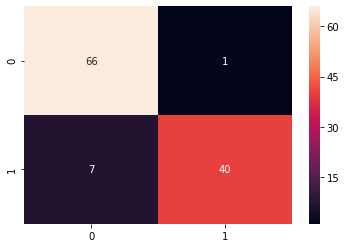

In [26]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot = True)

In [27]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

print(f"Accuracy: {round(accuracy_score(y_test, y_predict), 2)}") 
print(f"Precision: {round(precision_score(y_test, y_predict), 2)}")
print(f"Recall: {round(recall_score(y_test, y_predict), 2)}")
print(f"F1_score: {round(f1_score(y_test, y_predict), 2)}")

Accuracy: 0.93
Precision: 0.98
Recall: 0.85
F1_score: 0.91


In [28]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        67
           1       0.98      0.85      0.91        47

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



### Multiclass classification

In [4]:
from pydataset import data
iris = data('iris')

initiated datasets repo at: C:\Users\Sumi\.pydataset/


pandas.core.frame.DataFrame

In [6]:
iris['Species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: Species, dtype: int64

In [9]:
iris['Species'].replace({'setosa': 0, 'versicolor': 1, 'virginica': 2}, inplace = True)

In [10]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [12]:
Xi = iris.drop('Species', axis=1)
yi = iris['Species']

In [15]:
Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, test_size = 0.4, random_state = 0)
Xi_train.shape, Xi_test.shape, yi_train.shape, yi_test.shape

((90, 4), (60, 4), (90,), (60,))

In [20]:
# Create a Support Vector Machine object.
svm = SVC()
# Fit the model to the train set.
svm.fit(Xi_train, yi_train)
# Predict the classes on the test set.
yi_predict = svm.predict(Xi_test)

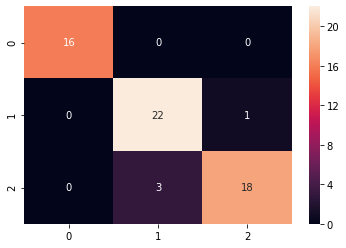

In [21]:
sns.heatmap(confusion_matrix(yi_test, yi_predict), annot = True)

In [22]:
print(classification_report(yi_test, yi_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.88      0.96      0.92        23
           2       0.95      0.86      0.90        21

    accuracy                           0.93        60
   macro avg       0.94      0.94      0.94        60
weighted avg       0.94      0.93      0.93        60

